In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
from tensorflow.keras.optimizers.legacy import Adam
from keras.regularizers import l2
import datetime
import tensorflow as tf
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
import os

# Define the folder path
folder_path = "C:/Users/rache/OneDrive - Middle East College/chest_xray"

# List all files in the 'test' directory
test_folder_path = os.path.join(folder_path, "test")
test_files = os.listdir('C:/Users/rache/OneDrive - Middle East College/chest_xray/test')

# List all files in the 'train' directory
train_folder_path = os.path.join(folder_path, "train")
train_files = os.listdir('C:/Users/rache/OneDrive - Middle East College/chest_xray/train')

# List all files in the 'validation' directory
validation_folder_path = os.path.join(folder_path, "validation")
validation_files = os.listdir('C:/Users/rache/OneDrive - Middle East College/chest_xray/val')

# Display the lists of files
print("Test Files:", test_files)
print("Train Files:", train_files)
print("Validation Files:", validation_files)


Test Files: ['NORMAL', 'PNEUMONIA']
Train Files: ['NORMAL', 'PNEUMONIA']
Validation Files: ['NORMAL', 'PNEUMONIA']


In [3]:
# Image size
img_size = (224, 224,1)

In [4]:
# Display the counts

# Display the counts
test_count = len(test_files)
train_count = len(train_files)
validation_count = len(validation_files)

print("Test Files Count:", test_count)
print("Train Files Count:", train_count)
print("Validation Files Count:", validation_count)


Test Files Count: 2
Train Files Count: 2
Validation Files Count: 2


In [5]:
import os

# Define the folder paths
train_folder_path = 'C:/Users/rache/OneDrive - Middle East College/chest_xray/train'
test_folder_path = 'C:/Users/rache/OneDrive - Middle East College/chest_xray/test'
validation_folder_path = 'C:/Users/rache/OneDrive - Middle East College/chest_xray/val'

# Count the number of files in the 'train' directory for 'NORMAL' and 'PNEUMONIA'
train_normal_count = len(os.listdir(os.path.join(train_folder_path, 'NORMAL')))
train_pneumonia_count = len(os.listdir(os.path.join(train_folder_path, 'PNEUMONIA')))

# Count the number of files in the 'test' directory for 'NORMAL' and 'PNEUMONIA'
test_normal_count = len(os.listdir(os.path.join(test_folder_path, 'NORMAL')))
test_pneumonia_count = len(os.listdir(os.path.join(test_folder_path, 'PNEUMONIA')))

# Count the number of files in the 'validation' directory for 'NORMAL' and 'PNEUMONIA'
validation_normal_count = len(os.listdir(os.path.join(validation_folder_path, 'NORMAL')))
validation_pneumonia_count = len(os.listdir(os.path.join(validation_folder_path, 'PNEUMONIA')))

# Display the counts
print("Train - NORMAL Count:", train_normal_count)
print("Train - PNEUMONIA Count:", train_pneumonia_count)
print("Test - NORMAL Count:", test_normal_count)
print("Test - PNEUMONIA Count:", test_pneumonia_count)
print("Validation - NORMAL Count:", validation_normal_count)
print("Validation - PNEUMONIA Count:", validation_pneumonia_count)


Train - NORMAL Count: 1341
Train - PNEUMONIA Count: 3875
Test - NORMAL Count: 234
Test - PNEUMONIA Count: 390
Validation - NORMAL Count: 8
Validation - PNEUMONIA Count: 8


In [6]:
import tensorflow as tf

# Define the folder paths
base_folder_path = 'C:/Users/rache/OneDrive - Middle East College/chest_xray'
train_folder_path = 'train'
test_folder_path = 'test'
validation_folder_path = 'validation'

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Flow training images in batches using the generator
train_generator = train_datagen.flow_from_directory(
    os.path.join(base_folder_path, train_folder_path),
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training',
    color_mode='grayscale'  # Specify that the images are grayscale
)

# Flow validation images in batches using the generator
validation_generator = train_datagen.flow_from_directory(
    os.path.join(base_folder_path, train_folder_path),
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    color_mode='grayscale'  # Specify that the images are grayscale
)


Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


In [29]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create CNN model
model = Sequential()

# Adjust the number of filters in the first convolutional layer
model.add(Conv2D(6, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(224, 224, 1)))
model.add(BatchNormalization())  #Added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())  #Added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())  #Added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))  #Added to reduce overfitting
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))  #Added to reduce overfitting
model.add(Dense(1, activation='sigmoid'))  # Keep 'sigmoid' for binary classification

# Compile the model with Adam optimizer and a learning rate of 0.001
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 6)       60        
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 6)       0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      3520      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 128)      

In [30]:

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=3
)
 

Epoch 1/3
131/131 [==============================] - 102s 757ms/step - loss: 0.2051 - accuracy: 0.9156 - val_loss: 0.1352 - val_accuracy: 0.9482
Epoch 2/3
131/131 [==============================] - 95s 727ms/step - loss: 0.0871 - accuracy: 0.9674 - val_loss: 0.1180 - val_accuracy: 0.9559
Epoch 3/3
131/131 [==============================] - 95s 722ms/step - loss: 0.0677 - accuracy: 0.9756 - val_loss: 0.1042 - val_accuracy: 0.9569


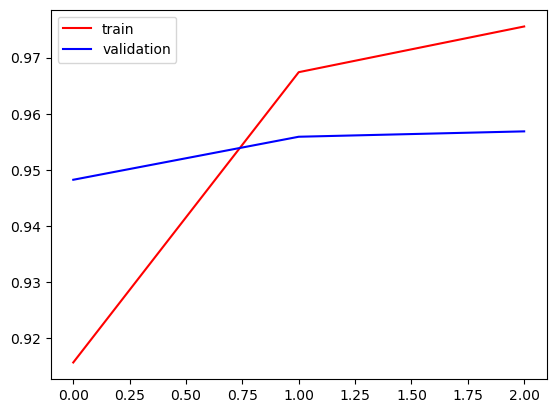

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

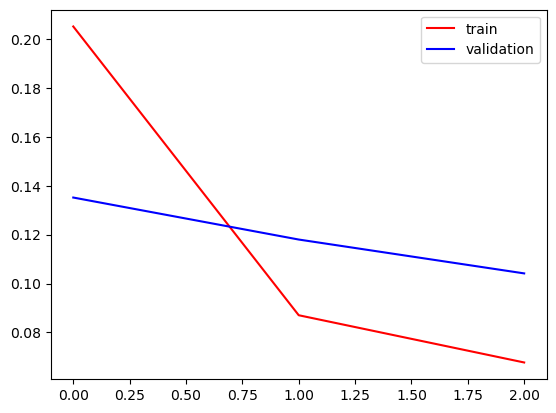

In [32]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [33]:
# Create ImageDataGenerator for test set
test_datagen = ImageDataGenerator(
    rescale=1./255
)


test_data = test_datagen.flow_from_directory(
    test_folder_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 624 images belonging to 2 classes.


In [34]:


# Flow test images in batches using the generator
test_generator = test_datagen.flow_from_directory(
    os.path.join(base_folder_path, test_folder_path),
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale'  # Specify that the images are grayscale
)


#predict the test data
predictions = model.predict(test_generator)
print(predictions)

Found 624 images belonging to 2 classes.
20/20 [==============================] - 9s 415ms/step
[[9.99984086e-01]
 [9.99881089e-01]
 [9.99785602e-01]
 [8.05191100e-01]
 [9.99993801e-01]
 [9.99985814e-01]
 [8.45145166e-01]
 [9.68443334e-01]
 [9.95649576e-01]
 [9.84835744e-01]
 [1.24515658e-02]
 [3.76314908e-01]
 [8.67652655e-01]
 [9.98670697e-01]
 [9.98073578e-01]
 [9.98556793e-01]
 [9.99965787e-01]
 [5.85387507e-03]
 [9.91899312e-01]
 [1.13427853e-02]
 [9.99998569e-01]
 [9.94386435e-01]
 [7.72703290e-01]
 [2.89190207e-02]
 [9.99800265e-01]
 [9.99992669e-01]
 [9.99972284e-01]
 [3.78646761e-01]
 [9.99901116e-01]
 [6.96937740e-01]
 [9.99874294e-01]
 [5.86931467e-01]
 [4.05123055e-01]
 [9.99909580e-01]
 [9.95663941e-01]
 [9.99175966e-01]
 [7.56328751e-04]
 [9.99988437e-01]
 [9.97584581e-01]
 [7.30088830e-01]
 [9.99936461e-01]
 [9.99840140e-01]
 [9.50683475e-01]
 [1.67939067e-01]
 [9.99921918e-01]
 [9.99759197e-01]
 [9.99889135e-01]
 [9.76423800e-01]
 [4.64957714e-01]
 [7.00055901e-03]
 [9.

In [35]:
len(predictions)

624

In [36]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed


# Define class labels
class_labels = ['NORMAL', 'PNEUMONIA']

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[ 37 197]
 [ 59 331]]
Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.16      0.22       234
           1       0.63      0.85      0.72       390

    accuracy                           0.59       624
   macro avg       0.51      0.50      0.47       624
weighted avg       0.54      0.59      0.53       624



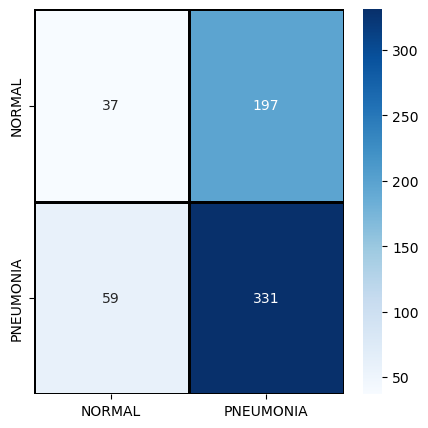

In [37]:

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='', xticklabels=class_labels, yticklabels=class_labels)
plt.show()


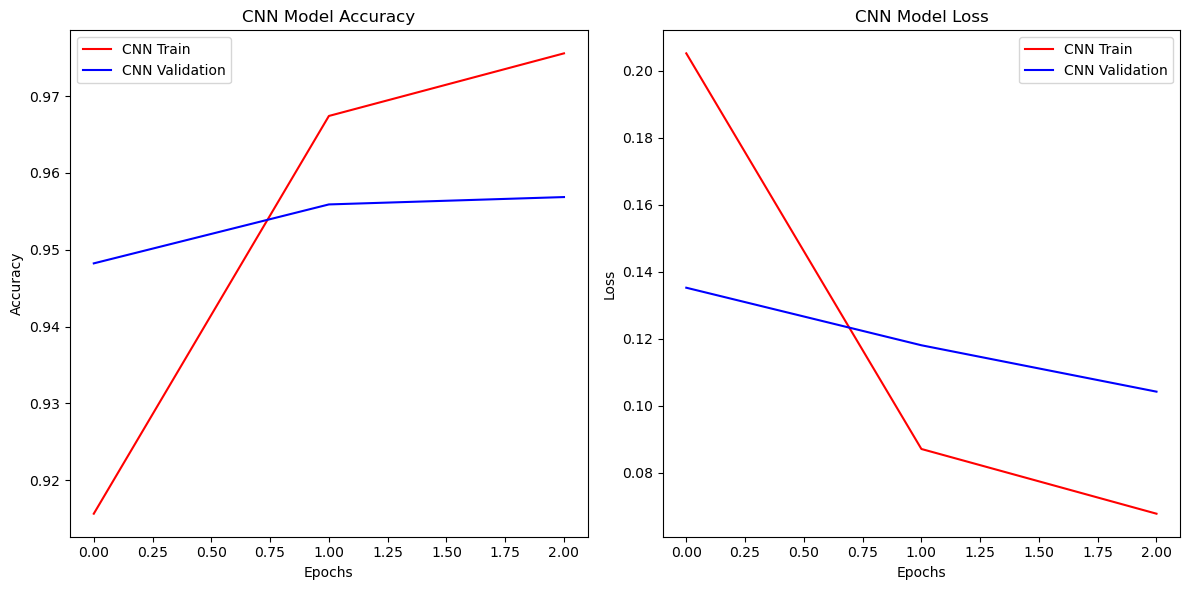

In [38]:
# Plot accuracy and loss for CNN
plt.figure(figsize=(12, 6))

# Plot CNN accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], color='red', label='CNN Train')
plt.plot(history.history['val_accuracy'], color='blue', label='CNN Validation')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot CNN loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], color='red', label='CNN Train')
plt.plot(history.history['val_loss'], color='blue', label='CNN Validation')
plt.title('CNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()